<h1>Produzido por Bruno Audric da Silva Oliveira</h1>

In [26]:
import pandas as pd 

# 1 - Como os dados foram recebidos

In [27]:
#Leitura do DataFrame.
df = pd.read_csv('content\desafio_indicium_imdb.csv', index_col = 0)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bruno\AppData\Local\Temp\ipykernel_8324\678105807.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('content\desafio_indicium_imdb.csv', index_col = 0)


In [28]:
#Informações básicas das 5 primeiras e 5 últimas linhas.
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [29]:
#A partir deste comando podemos visualizar a relação entre linha x coluna com dados nulos.
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [30]:
#Aqui observamos o tipo dos dados que estamos lidando.
df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [31]:
'''
As informações sobre dados numéricos, note que não contém Runtime nem Gross, como o senso comun indica deveriam ser numéricos, mais a frente iremos
realizar as transformações para uso dos dados.
'''
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


# 2 - Limpeza dos dados

In [32]:
#Preenche valores nulos de Certificate com Unknown, não vale a pena perder dados com uma coluna categórica.
df['Certificate'] = df['Certificate'].fillna('Unknown')

#Preenche valores nulos de Meta_score com a mediana, pois há grande diferença de valores sendo o minimo 28 e o máximo 100.
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())


# Remove vírgulas, converte para numérico ignorando valores nulos, e por fim preenche os nulos com a mediana para fugir de valores extremos, sendo altos ou baixos
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

#Transformação de Runtime em inteiro, com a remoção da parte string ' min'
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

#Com isso podemos fazer as relações categóricas e numéricas.

In [33]:
#Aqui podemos ter uma visualização dos dados após o tratamento.
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23457439.5
996,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,23457439.5
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,Unknown,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23457439.5


# 3 - Plotagem para análise de relações e deduções

<h4>Preparando ambiente para a plotagem<h4/>

In [34]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

<h2>a) Qual filme você recomendaria para uma pessoa que você não conhece?<h2/>

Text(0, 0.5, 'Quantidade de votos')

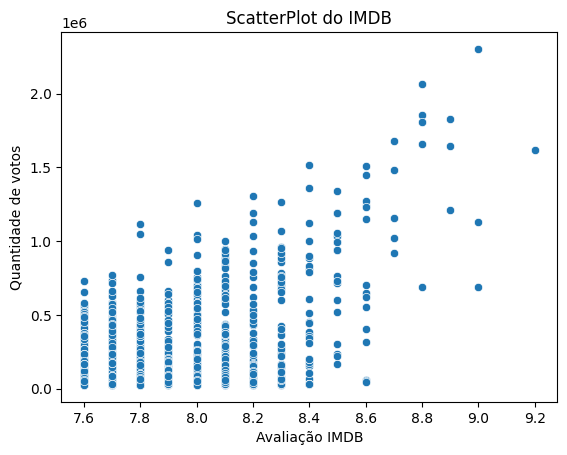

In [35]:
#Gera um ScatterPlot simples com a avaliação do IMDB no eixo X e o numero de votos no eixo y
plt.title('ScatterPlot do IMDB')
sns.scatterplot(x=df['IMDB_Rating'], y=df['No_of_Votes'])
plt.xlabel('Avaliação IMDB', fontsize=10)
plt.ylabel('Quantidade de votos', fontsize=10)

<h4>Com base nesse ScatterPlot temos como principais recomendações de filmes os que se localizam o mais próximo possivel ao canto superior direito, porém vamos abordar uma metodologia mais consistente e justa, para nossa recomendação.<h4/>

Text(0, 0.5, 'Score(0-10)')

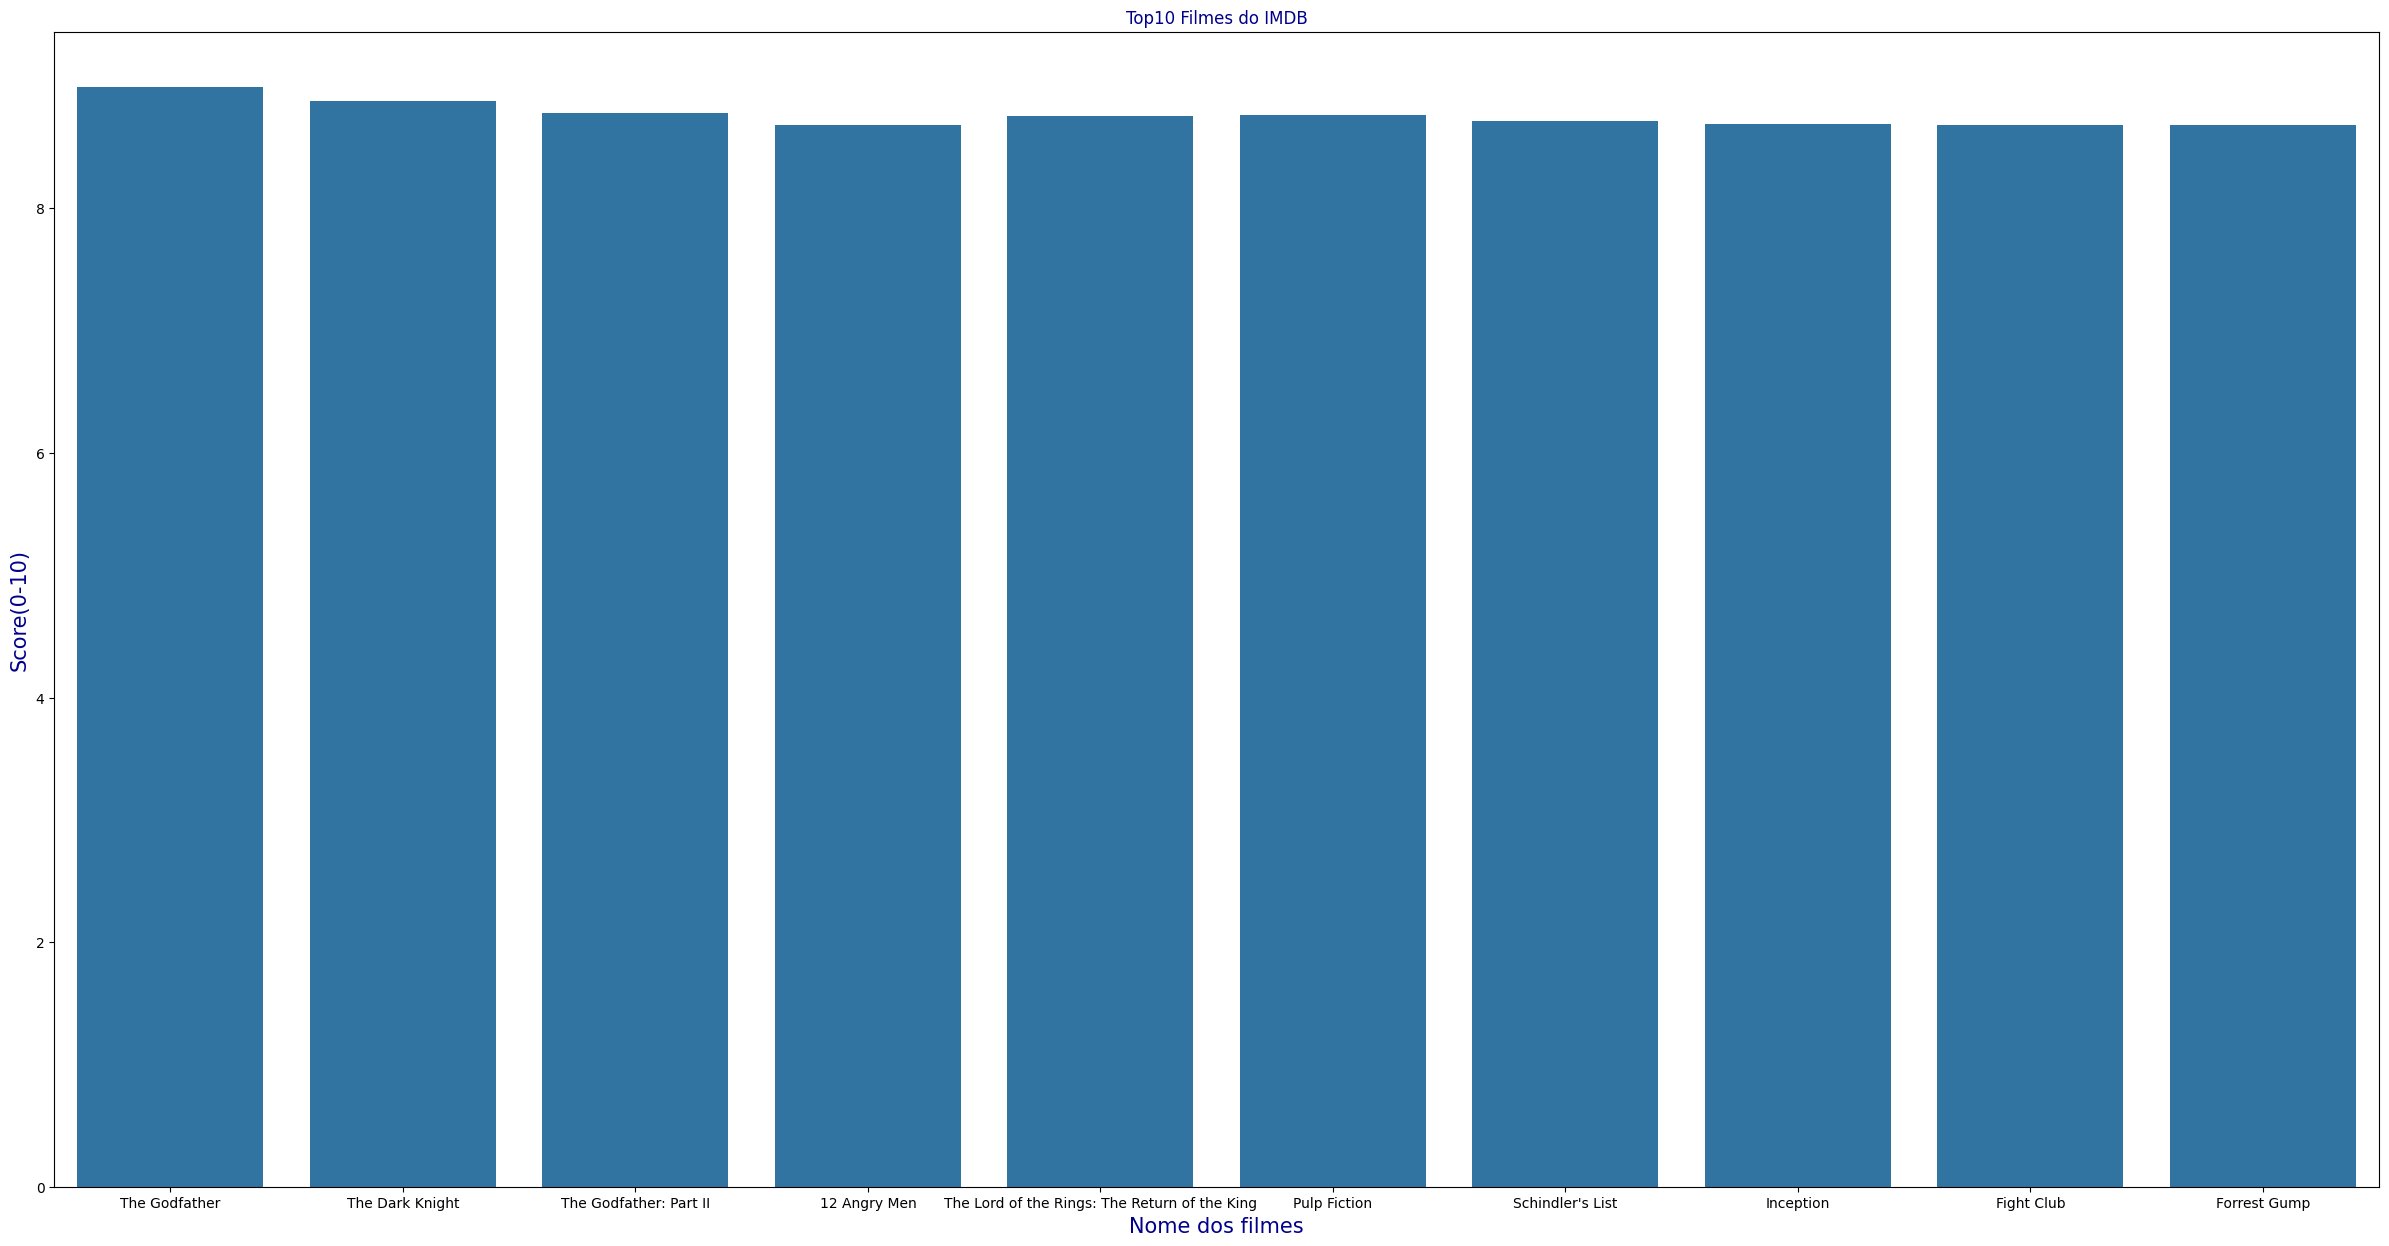

In [36]:
''' 
Irei gerar um Top10 para recomendação também, vamos utilizar a verdadeira fórmula do IMDB para classificação de filmes, onde os filmes
devem possuir um numero minimo de votos para se enquadrar no cálculo de média ponderada, isso vai gerar um ranking mais justo, garantindo que um
filme com uma única avaliação 10, não ocupe a primeira colocação. Não temos certeza absoluta dos parâmetros usados pelo IMDB, porém da para chegar a
um resultado aproximado.
https://math.stackexchange.com/questions/169032/understanding-the-imdb-weighted-rating-function-for-usage-on-my-own-website
'''
#Define o número mínimo de votos para
minimo_votos = df['No_of_Votes'].quantile(0.75) 

media_geral_dos_qualificados = df[df['No_of_Votes'] >= minimo_votos]['IMDB_Rating'].mean()


def calcular_score_imdb(filme, m=minimo_votos, C=media_geral_dos_qualificados):
    """
    Argumentos:
        filme (pd.Series): A linha do DataFrame correspondente ao filme.
        m (int): O número mínimo de votos necessários para constar no ranking.
        C (float): A nota média de todos os filmes do dataset.
    """
    v = filme['No_of_Votes']
    R = filme['IMDB_Rating']
    
    # Fórmula: (v / (v + m) * R) + (m / (v + m) * C), Retorna o score ponderado.
    return (v / (v + m) * R) + (m / (v + m) * C)

# Copiando o nosso DataFrame principal para um DataFrame do EDA e adicionando nossa nova coluna de score ponderado
EDAdf = df.copy()
EDAdf['weighted_score'] = EDAdf.apply(calcular_score_imdb, axis=1)

# Ordenando o ranking
EDAdf = EDAdf.sort_values('weighted_score', ascending=False)

# Criando o grafico de barras com o top10
plt.figure(figsize=(30, 15))
plt.title('Top10 Filmes do IMDB', color = 'darkblue')
sns.barplot(x=EDAdf['Series_Title'].head(10), y=EDAdf['weighted_score'])
plt.xlabel('Nome dos filmes', fontsize=15, color = 'darkblue')
plt.ylabel('Score(0-10)', fontsize=15, color = 'darkblue')

<h4>Para a resposta da nossa pergunta temos esse gráfico, da esquerda para direita temos o Top10 do filme mais recomendado, utilizando um cálculo aproximado ao do próprio IMDB. O filme mais recomendado por mim é o da primeira colocação do Ranking IMDB, 'The Godfather'.<h4/>

<h2>b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? <h2/>

<h4>Vamos gerar alguns gráficos e realizar a análise</h4>

Text(0, 0.5, 'Diretores')

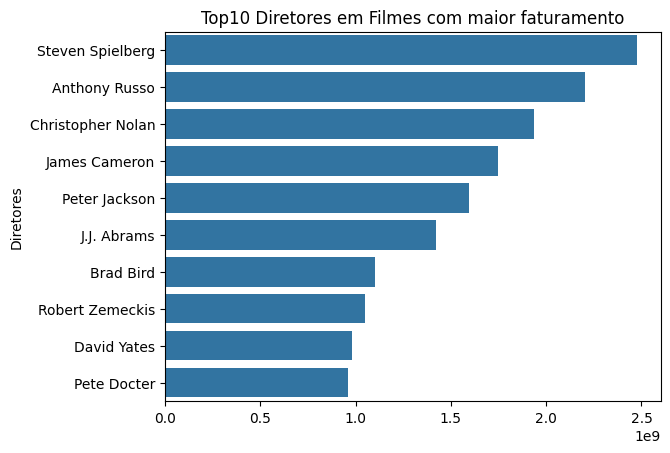

In [37]:
#Reordenando nosso DataFrame pelo Faturamento
EDAdf = EDAdf.sort_values('Gross', ascending=False)

#Agrupando os nomes iguais como um único Diretor e todos os faturamentos nos filmes que Dirigiram. Ordenando pelo que teve maior faturamento
diretores_gross = EDAdf.groupby('Director')['Gross'].sum()
diretores_gross = diretores_gross.sort_values(ascending = False)

#Gerando plot e alguns métricas para deixar mais bonitinho, acessando através de valor e index.
plt.title('Top10 Diretores em Filmes com maior faturamento')
sns.barplot(x=diretores_gross.head(10).values, y=diretores_gross.head(10).index)
plt.ylabel('Diretores')

Text(0, 0.5, 'Atores')

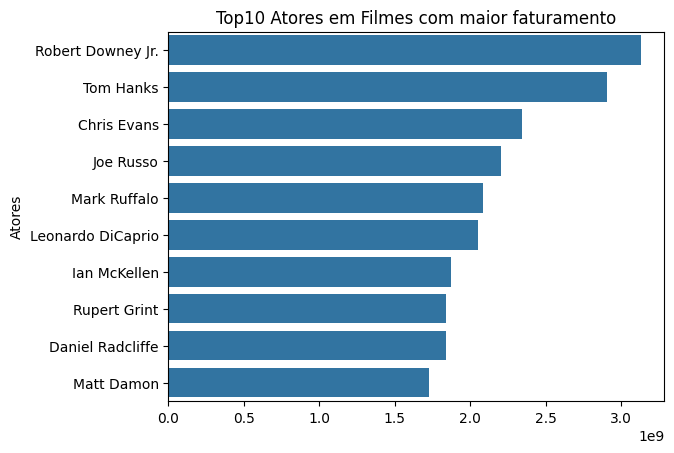

In [38]:
#Empilhando as colunas das estrelas e os faturamentos dos filmes em que estiveram presentes
atores_gross = df.melt(
    id_vars=['Gross'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    value_name='Actor'
)

#Agrupando os nomes iguais como um único ator e os faturamentos nos filmes que estiveram presentes. Ordenando pelo que teve maior faturamento
atores_gross = atores_gross.groupby('Actor')['Gross'].sum()
atores_gross = atores_gross.sort_values(ascending = False)

#Gerando plot e alguns métricas para deixar mais bonitinho, acessando através de valor e index.
plt.title('Top10 Atores em Filmes com maior faturamento')
sns.barplot(x=atores_gross.head(10).values, y=atores_gross.head(10).index)
plt.ylabel('Atores')

Text(0, 0.5, 'Gêneros')

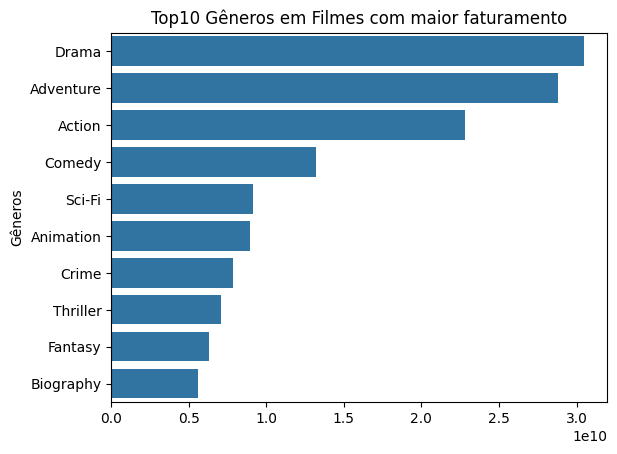

In [39]:
'''
Aqui foi necessario remover as virgulas e separar todas as palavras em um mesmo filme, garantindo que elas ainda possuam uma linha com as mesmas 
informações das suas vizinhas de filme. Logo após também fora removidos os ' '(espaços).
'''
dfGeneros = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
dfGeneros['Genre'] = dfGeneros['Genre'].str.strip()

#Agrupa tudo que tiver nome igual e vai somando o Faturamento.
grossPorGenero = dfGeneros.groupby('Genre')['Gross'].sum()
grossPorGenero = grossPorGenero.sort_values(ascending=False)

#Gerando plot e alguns métricas para deixar mais bonitinho, acessando através de valor e index.
plt.title('Top10 Gêneros em Filmes com maior faturamento')
sns.barplot(x=grossPorGenero.head(10).values, y=grossPorGenero.head(10).index)
plt.ylabel('Gêneros')

Text(0, 0.5, 'Anos')

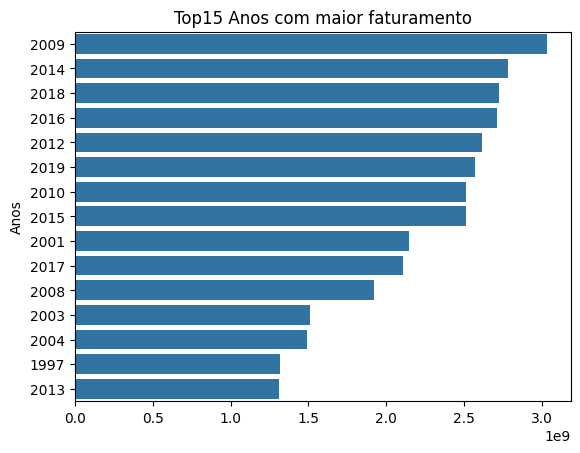

In [40]:
#Somando todos os Faturamentos para anos iguais e agrupando
grossPorAno = EDAdf.groupby('Released_Year')['Gross'].sum()
grossPorAno = grossPorAno.sort_values(ascending=False)

#Gerando plot e alguns métricas para deixar mais bonitinho, acessando através de valor e index.
plt.title('Top15 Anos com maior faturamento')
sns.barplot(x=grossPorAno.head(15).values, y=grossPorAno.head(15).index)
plt.ylabel('Anos')

<h4>Com base nos dados apresentados acima, podemos inferir que as principais métricas são o diretor, os atores e os gêneros do filme. Contudo, temos dados também do faturamento por ano de lançamento, porém não seria uma boa métrica atemporal, pois o top 15 e o resto da estrutura desses anos é composto por datas mais recentes, perto da mudança do século XX para o século XXI, isso se deve principalmente porque atualmente temos uma maior disponibilidade de recursos para assistir aos filmes, como maior número de cinemas e streamings, e não sabemos como ficará a disponibilidade desses recursos no futuro. Como nossa base de dados nos apresenta um top 1000, não podemos inferir também que filmes com mais votos geram mais dinheiro, pois podem haver filmes com muitos votos, porém negativos, e a receita gerada por esse filme pode ser alta.
</h4>
<h4>
A escolha de um Ranqueamento para a resposta da nossa pergunta foi para que pudessemos observar o acumulo de faturamento em certas métricas, para fazermos nossas deduções
</h4>
<em>Uma métrica adicional que poderia ser analisada também e traria ótimos resultados seria a empresa responsável pela produção do filme, como por exemplo a Walt Disney Studios, que produziu muitíssimos sucessos.</em>

<h2>c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?<h2/>


<h5>A partir da biblioteca nltk(Natural Language Toolkit), podemos fazer a remoção de algumas palavras auxiliares do idioma Inglês(Stopwords) de grande ocorrência que não nos seriam uteis, para uma análise das ocorrências de palavras mais comuns por gênero cinematográfico</h5>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


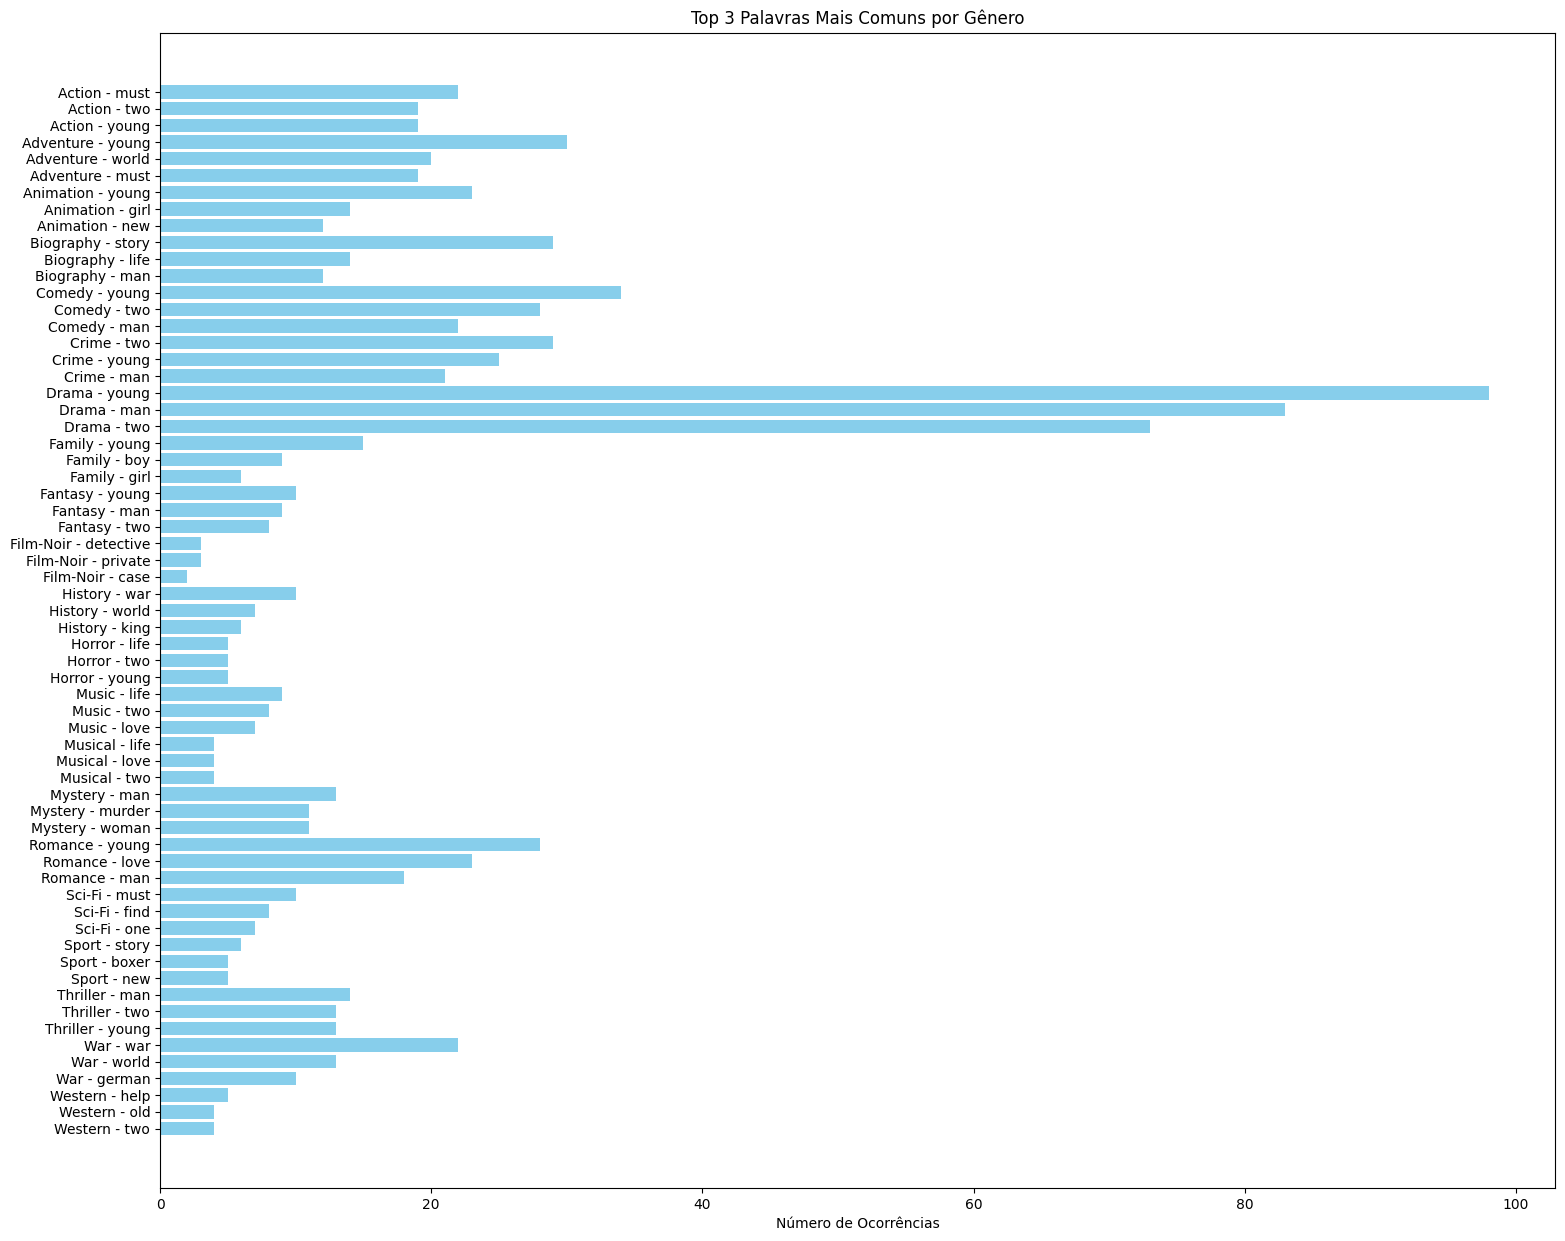

In [41]:
#Importação e preparação da biblioteca nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

#Copiando o dfGeneros para facilitar. Transformação de todo os Overviews em palavras minusculas
dfOverview = dfGeneros.copy()
dfOverview['Overview'] = dfOverview['Overview'].str.lower()

#Função de remoção de Stopwords
def removerStopwords(sentence): 
    #Recebe o Overview, o divide numa lista, remove os stopwords e mantém como lista o Overview.
    frase = sentence.split() 
    palavraFiltrada = [palavra for palavra in frase if palavra not in stop_words] 
    return palavraFiltrada

#Aplica a função para remover Stopwords, divide toda as listas de Overview em novas linhas mantendo as outras colunas para outras palavras.
dfOverview['Overview'] = dfOverview['Overview'].map(removerStopwords)
dfOverview = dfOverview.explode('Overview')
dfOverview['Overview'] = dfOverview['Overview'].str.strip()

#Gera uma coluna de ocorrências, agrupa palavras iguais de mesmo Overview e soma suas ocorrências, ordena por maior ocorrência e transforma em DataFrame novamente.
dfOverview['Ocorrencias'] = 1
dfOverview = dfOverview.groupby(['Genre', 'Overview'])['Ocorrencias'].sum()
dfOverview = dfOverview.sort_values(ascending = False)
dfOverview = dfOverview.reset_index()

#Cria um DataFrame a partir de Overview com as 3 maiores ocorrências de cada gênero
top3Palavras = dfOverview.groupby('Genre').head(3).reset_index(drop=True)
top3Palavras = top3Palavras.sort_values(['Genre', 'Ocorrencias'], ascending=[True, False])
top3Palavras['Label'] = top3Palavras['Genre'] + ' - ' + top3Palavras['Overview']

#Gera nosso belo plot
plt.figure(figsize=(18, 15))
plt.barh(top3Palavras['Label'], top3Palavras['Ocorrencias'], color='skyblue')
plt.xlabel('Número de Ocorrências')
plt.title('Top 3 Palavras Mais Comuns por Gênero')
plt.gca().invert_yaxis()
plt.show()

<h4>
Com base em nosso gráfico podemos dizer, que a partir do Overview podemos gerar uma lista com número de ocorrências de Gênero X Palavra, com isso é possível construir uma Bag of words, para gerar um sistema de previsão de Gênero com base em Overview, alguns gêneros exigem menos palavras para a filtragem, como o War que seu Top3 são palavras bem específicas, que são 'war', 'world', e 'german' palavras bastante por dentro do temas, entretanto a grande massa dos filmes possuem gêneros similares e com uma vertente parecida, como Action e Adventure, e para isso precisariamos de uma Bag of words maior para esses gêneros.
</h4>
<h4>
Contudo é possível sim inferir o gênero a partir da coluna Overview, gerando uma Bag of words de palavras mais comum por gênero e assim fazendo a limpeza de palavras com grande incidência porém não categorizadas como Stopword, como 'young', 'two' e 'man', e logo após dependendo do uso gerar um modelo de predição ou realizar uma auto análise.
</h4>

# 3 - Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

<h4>Vamos tirar nossas conclusões com os Modelos de Machine Learning abaixo.</h4>

In [42]:
#Exibe varíaveis numéricas e suas correlações, foco na correlação com imdb
dfCorr = df[['Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes','Gross']].copy()
dfCorr.corr()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime,1.000000,0.242751,-0.026479,0.172483,0.138628
IMDB_Rating,0.242751,1.000000,0.261010,0.479308,0.088139
Meta_score,-0.026479,0.261010,1.000000,-0.028558,-0.051865
No_of_Votes,0.172483,0.479308,-0.028558,1.000000,0.602705
Gross,0.138628,0.088139,-0.051865,0.602705,1.000000


In [43]:
#Preparando o ambiente para o desenvolvimento de Modelos de ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#Funções para a avaliação das Regressão
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

#x = Métricas para prever o IMDB, y = IMDB
features = ['Meta_score', 'No_of_Votes','Gross']
x = df[features]
y = df['IMDB_Rating']

#Divide os dados em teste e treino, e define uma seed para fins de reprodução
xTreino, xTeste, yTreino, yTeste = train_test_split(x , y, train_size = 0.7, random_state = 111)

In [44]:
#A variavel predição recebe o filme a ser previsto o IMDB
predicao = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

#Esta função realiza a limpeza dos dados do filme que precisa ser previsto como no tópico 2 deste notebook, retorna um Dataframe para predição
def limpezaDaEntrada(filme):
    filme['Gross'] = int(filme['Gross'].replace(',', ''))
    
    predicaoDf = pd.DataFrame([{
        'Meta_score': filme['Meta_score'],
        'No_of_Votes': filme['No_of_Votes'],
        'Gross': filme['Gross']
    }])
    return predicaoDf

#Chama a função limpezaDaEntrada e Guarda numa variavel
filmeTeste = limpezaDaEntrada(predicao)

<h4>
Resultado da predição e avaliação dos Modelos
</h4>

In [45]:
#Estabelece o modelo de Regressão Linear
ModeloLinear = LinearRegression()
#Faz o treinamento do modelo
ModeloLinear.fit(xTreino, yTreino)
#Faz o resultado da predição do IMDB com o nosso filme
resultadoLinear =  ModeloLinear.predict(filmeTeste)[0]
#Imprime o Resultado aproximado do IMDB
print(f"Nota prevista por Regressão Linear para '{predicao['Series_Title']}': {resultadoLinear:.1f}")

Nota prevista por Regressão Linear para 'The Shawshank Redemption': 9.2


In [46]:
#Variavel com os testes de Regressão Linear
yPredicoesR = ModeloLinear.predict(xTeste)

#Avaliação MAE Regressão Linear
maeRegressao = mean_absolute_error(yTeste, yPredicoesR)
#Avaliação R2 Regressão Linear
r2Regressao = r2_score(yTeste, yPredicoesR)
#Impressão das avaliações
print(f'MAE Regressão Linear = {maeRegressao:.1f}\nR2 Regressão Linear = {r2Regressao:.1f}')

MAE Regressão Linear = 0.2
R2 Regressão Linear = 0.4


<h4>
Resultado da predição e avaliação do Modelo de Decision Tree Regressor
</h4>

In [47]:
#Estabelece o modelo de Decision Tree Regressor
DecisionTreeModelo = DecisionTreeRegressor(random_state = 111)
#Faz o treinamento do modelo
DecisionTreeModelo.fit(xTreino, yTreino)
#Faz o resultado da predição do IMDB com o nosso filme
resultadoDecision =  DecisionTreeModelo.predict(filmeTeste)[0]
#Imprime o Resultado aproximado do IMDB
print(f"Nota prevista por Decision Tree para' {predicao['Series_Title']}': {resultadoDecision:.1f}")

Nota prevista por Decision Tree para' The Shawshank Redemption': 8.8


In [48]:
#Variavel com os testes de Decision Tree Regressor
yPredicoesDecision = DecisionTreeModelo.predict(xTeste)
#Avaliação MAE Decision Tree Regressor
maeDecision = mean_absolute_error(yTeste, yPredicoesDecision)
#Avaliação R2 Decision Tree Regressor
r2Decision = r2_score(yTeste, yPredicoesDecision)
#Impressão das avaliações
print(f'MAE Decision Tree = {maeDecision:.1f}\nR2 Decision Tree = {r2Decision:.1f}')

MAE Decision Tree = 0.2
R2 Decision Tree = 0.1


<h4>
Resultado da predição e avaliação do Modelo de Random Forest Regressor
</h4>

In [49]:
#Estabelece o modelo de Random Forest Regressor
RandomForestModelo = RandomForestRegressor(random_state = 111)
#Faz o treinamento do modelo
RandomForestModelo.fit(xTreino, yTreino)
#Faz o resultado da predição do IMDB com o nosso filme
resultadoRandom =  RandomForestModelo.predict(filmeTeste)[0]
#Imprime o Resultado aproximado do IMDB
print(f"Nota prevista por Random Forest Regressor para' {predicao['Series_Title']}': {resultadoRandom:.1f}")

Nota prevista por Random Forest Regressor para' The Shawshank Redemption': 8.7


In [50]:
#Variavel com os testes de Random Forest Regressor
yPredicoesRandom = RandomForestModelo.predict(xTeste)
#Avaliação MAE Random Forest Regressor
maeRandom = mean_absolute_error(yTeste, yPredicoesRandom)
#Avaliação R2 Random Forest Regressor
r2Random = r2_score(yTeste, yPredicoesRandom)
#Impressão das avaliações
print(f'MAE Random Forest Regressor = {maeRandom:.1f}\nR2 Random Forest Regressor = {r2Random:.1f}')

MAE Random Forest Regressor = 0.2
R2 Random Forest Regressor = 0.5


<h4>
   Realizei a predição da nota IMDB a partir da biblioteca 'sci-kit learn' do python, com ela nos é disponibilizado modelos de alta performance de Machine Learning, através disso, a partir de testes separei os melhores dados com correlação linear com o IMDB para o uso na predição de IMDB de filmes
</h4>

<h4>
    Eu usei as variaveis numéricas No_of_Votes, Meta_score e Gross, para predição da variavel IMDB, para gross foi necessário a transformação dele em inteiro, removendo as vírgulas e convertendo a variavel. A decisão do uso dessas variaveis vieram a partir de testes ondem foi possível encontrar melhores resultado utilizando elas em conjunto. Também foi testado o uso da variavel Runtime, porém não foi encontrado uma boa relação com IMDB, apresentando resultados melhores sem ela, grandes filmes não dependem de muito tempo de tela. 
</h4>

<h4>
    Estamos resolvendo um problema de regressão, pois desejamos prever um valor continuo de 0 a 10, o problema de classificação é utilizado para resolver problemas com resposta binária ou de multiplas classes.
</h4>

<h4>
    O modelo de Regressão Linear entregou resultados melhores, apesar do modelo Random Forest Regressor possuir melhores avaliações em nossos testes o Random Forest Regressor está predizendo próximo da média de similares pois o conhecimento dele sobre filmes de alto IMDB é limitado, já a Regressão Linear funciona melhor com um conjunto de dados médio e variabilidade média do que modelos como Decision Tree Regressor(Melhor com estruturas simples e um conjunto de dados menor) e Random Forest Regressor(Funciona melhor com grande variabilidades de dados e um grande conjunto de dados), ele possui uma velocidade de execução maior em relação a modelos como Random. Entretanto ele não tem uma interpretabilidade complexa, ou seja ele não assume correlações entre as variaveis independentes, ele só busca interações delas com o IMDB.
</h4>

<h4>
    MAE - Erro médio absoluto, ou seja ele nos explica o valor médio do erro que o Modelo pode realizar em relação ao resultado dos teste, ou seja o MAE 0.4 para uma nota real de 7.5 ele pode prever entre 7.1 e 7.9, portanto quanto mais próximo de 0 melhor.
</h4>
<h4>
    R2 Score (-1 - 1) - O R2 mede o 'poder de explicação' do seu modelo. Um R2 de 0.4 significa que as informações que eu usei (metascore, votos, etc.) conseguem explicar 40% do porquê um filme tem nota alta e outro tem nota baixa. Quanto mais perto de 1 melhor.  
</h4>

<h5>Referencial teôrico:</h5>

<a>https://www.kaggle.com/learn</a>

<a>https://www.oracle.com/br/artificial-intelligence/what-is-natural-language-processing/</a>

<a>https://www.ibm.com/br-pt/think/topics/bag-of-words</a>

<a>https://www.alura.com.br/artigos/metricas-de-regressao</a>
